# Linear Regression

[Click here](https://neuronjolt.com/data/downloads/linear_regression_5.ipynb) to download this chapter as a Jupyter (.ipynb) file.

Linear regression is an approach to modeling the relationship between one or more ***independent variables*** (also called explanatory variables), typically denoted as x, and a ***dependent variable*** denoted as y. Linear regression attempts to model the relationship between the independent variables and the dependent variable by "fitting" a linear equation to a sample of observed data. The linear equation estimates the value of the dependent variable as a linear function of the independent variables.

## Conceptual Model for Linear Regression

The conceptual linear regression model expresses the relationship between $n$ independent variables $x_{i,1}$ to $x_{i,n}$ and the dependent variable $y_{i}$ that is assumed to exist *in the population*:
$$y_{i}=\beta_{0}+\beta_{1}x_{i,1}+\beta_{2}x_{i,2}+\ldots+\beta_{n}x_{i,n}+\epsilon_{i}$$  

In this equation the error term $\epsilon_{i}$ is assumed to be normally distributed with a mean of $0$ and a constant variance. It represents random variation. The subscript $i$ in the conceptual equation refers to the $i^{th}$ instance in the population, and the second subscript on the $x$ variables just serves to distinguish amount the different $x_{i,n}$ variables. 

It is important to emphasize that the conceptual model represents the relationship between the independent variables and the dependent variable that exists in the population. Since we typically do not have access to all the individual cases in a population we estimate the linear regression model based on a sample drawn from the population. This estimate of the model is called the ***regression equation*** and is described in the next section. 

## Regression Equation

The linear regression procedure estimates the linear regression model by finding the $\beta$ terms for the equation that provide the best "fit" with the observed data in the sample.

When we run a linear regression procedure to create a specific regression model the equation produced as a result is typically written as:  
$$\hat{y}_{i}=b_{0}+b_{1}x_{i,1}+b_{2}x_{i,2}+\ldots+b_{n}x_{i,n}$$  

In this equation $\hat{y}_{i}$ refers to the predicted value of $y_{i}$. We see that predicted $y_{i}$ is just a weighted linear combination of the $x_{i,n}$ terms (the independent variables). The $b_{n}$ terms consist $b_{0}$, called the ***intercept***, and $b_{1}$ to $b_{n}$, which are referred to as the ***coefficients*** or ***weights***.

## Determining the $b_{n}$ Terms

So how does the linear regression procedure identify the coefficients that best fit the model to the observed data? We can find a big clue from the term that is commonly used to refer to linear regression. Standard linear regression is often called ***ordinary least squares regression*** because the method it uses to determine the $b_{n}$ terms is to minimize the sum of squared errors of the model, commonly abbreviated as **SSE**. What is the **SSE**? If we used the regression model to predict the $y_{i}$ variable for each case $i$ in our sample the error (also called the ***residual***) for each prediction is the difference between the actual value of $y_{i}$ and the predicted value, $\hat{y}_{i}$. If we square these differences and sum them over all the predictions we have calculated the **SSE**. So, this type of regression is referred to as ***ordinary least squares regression*** or ***OLS regression*** because the $b_{n}$ terms are selected to result in the lowest possible sum of squared errors. 

## Linear Regression as an Optimization Model

Because the linear regression procedure finds the weights for $x_{i,1}$ to $x_{i,n}$ that *minimize* the sum of squared errors it is an example of an ***optimization model***. Optimization models are models that seek to maximize or minimize the value of a particular function, called the ***optimization function***. For OLS regression the optimization function is the function that calculates the sum of squared errors.  

Later on, when we learn about the use of linear regression within machine learning models in a predictive analytics context we will see that the optimization function may be tweaked to produce a model that makes better predictions.

## Running a Linear Regression

Because linear regression is a common, well-known statistical technique it is implemented in a wide variety of software. You can run linear regressions in statistical software packages such as SPSS, SAS, and Stata, the statistical programming language R, or in the python statsmodels package. You can even run linear regression in Excel using the Data Analysis Toolpak add-on. We will be using the statsmodels package.

[Statsmodels](https://www.statsmodels.org/stable/index.html) is a python package that provides classes and functions to estimate many different statistical models, conduct statistical tests, and perform statistical data exploration. It provides an extensive list of result statistics for each procedure. We will use it to run linear regression models in this chapter and logistic regression models in the next chapter.

### Import Statements

In [1]:
import numpy as np
import pandas as pd

# Import statsmodels standard API
import statsmodels.api as sm

# Import statsmodels formula-based API
import statsmodels.formula.api as smf

# Import function to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

import math

from plotnine import (
    ggplot,
    aes,
    geom_point,
    geom_qq,
    geom_qq_line,
    geom_hline,
    geom_smooth,
    labs
)

### Load Data

Statsmodels has a `datasets` module with functions to load sample datasets to use for practice. Below we load the `mtcars` sample dataset and investigate the data. The data includes information about car models, including their average miles per gallon. In the sections below we will build a regression model to represent the car's miles per gallon (`mpg`) as a linear function of the car's horsepower (`hp`) and weight (`wt`). 

In [2]:
car_dat = sm.datasets.get_rdataset("mtcars").data

In [3]:
car_dat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


In [4]:
car_dat.head()

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
rownames                                                                     
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
rownames                 
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2

### Fitting the Regression Model with statsmodels

So far we have been referring to executing the regression procedure with statistical software as "running the model." Statisticians typically refer to running the model as "fitting the model," because the specific model that is produced by the statistical software is the model that best fits the observed sample data. Thus, the model is "fit" to the observed sample data. We will use this terminology going forward because it provides a closer match to the names of the statsmodels methods we will be using as we perform statistical procedures in this chapter and the next and the scikit-learn methods we will use when we move on to machine learning.

Fitting a model in statsmodels involves three steps:

1. Use the model's class function to instantiate an instance of the model
2. Fit the model instance to the data using a method of the model class
3. Inspect the results using a summary method of the model's results object

In statsmodels the class functions for various statistical models are provided via two APIs, the standard API and the formula-based API. The import statement for the standard API is `import statsmodels.api as sm` and the import statement for the formula-based API is `import statsmodels.formula.api as smf`. When you use the functions from the standard API you need to first get the data into a format that is suitable to be used by statsmodels by creating matrices with the independent variables, which statsmodels refers to as exogenous variables, and the dependent variable, which statsmodels refers to as the endogenous variable. The matrix for the independent variables must also include a column of 1s that is used to calculate the intercept term. I will demonstrate how to prepare the data and fit the model using the standard API because you may see this approach in examples you find online, but then I will show you how to use the functions from the formula-based API, which creates the data matrices behind the scenes, saving us some work!

The formula-based API hosts many of the same functions found in standard API, but the versions in the formula-based API have lowercase names. Also, the standard API is typically imported with the alias `sm` and the formula-based API is typically imported with the alias `smf`. These differences will help you determine which API is being used when you see examples of statsmodels code.

#### Using the Standard API

In this section I will show how to fit the regression model using the statsmodels standard API. First, we need to get the data into proper format to be used by the statsmodels standard API's functions. (We will learn how to avoid this step later, when we cover how to fit the regression model using the formula-based API.)

One way to get the data into the proper format is to manually create a DataFrame for the independent variables and a Series for the dependent variable. The DataFrame for the independent variables must also include a column of 1s that is used to calculate the intercept term. We can add that column of 1s with the `add_constant()` function from the standard API (or by simply adding a new column using pandas functions).

In [5]:
# Create matrices for exogenous (X) and endogenous (y) variables

# Make a DataFrame of only the columns we are using as independent variables
X = car_dat.loc[:, ['hp', 'wt']]

# Add the column of 1s for the intercept term
X = sm.add_constant(X)

# Make a Series for the dependent variable
y = car_dat['mpg']

After preparing the data we first instantiate an instance of the model by using the model's class function. Below we instantiate an instance of the OLS model with the data we have prepared, using the `OLS()` function. As we have learned, "OLS" stands for "ordinary least squares," which is a common name for the standard linear regression procedure because linear regression identifies the coefficients which mimimize the sum of squared errors. Note that the function we use is `OLS()`. We can see that it is from the standard API because it is preceded by `sm` and the function name uses uppercase letters.

Next, we fit the model instance to the data with the model instance's `fit()` method. This returns a results object, which we assign to the variable `results_1`. 

Finally, we use the `summary()` method of the results object to view the results summary in an easy-to-read format. Later in the chapter we will discuss how to interpret the summary output.

In [6]:
# instantiate the OLS model instance
mpg_model_1 = sm.OLS(endog = y, exog = X)

# fit the model instance to the data; assign results to variable
results_1 = mpg_model_1.fit()

# print summary of the results
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           9.11e-12
Time:                        12:42:55   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2273      1.599     23.285      0.0

#### Using the Formula-Based API

When we use the formula-based API we can skip the step of preparing the data as separate matrices for the independent and dependent variables. Instead, within the model's class function we specify the form of the model's equation with a text string in a specified format, called a "formula." The format for the formula is:

```
'[dependent variable] ~ [independent variable 1] + ... [independent variable n]'
```

Because we are building a model to predict miles per gallon (`mpg`) from horsepower (`hp`) and vehicle weight (`wt`), the formula string for the model will be:

```
'mpg ~ hp + wt'
```

Below we instantiate an instance of the OLS model using the `ols()` function from the formula-based API. Note that the function is preceded by `smf` and uses lowercase letters. Within the `ols()` function we specify the formula to be used for the model and the data source. Notice that the formula uses column names from the `car_dat` DataFrame, and that we can specify the whole DataFrame, even though the model only uses a subset of its columns. When we use the formula-based API like this the input matrices are created behind the scenes, so we don't have to make them ourselves.

The model fit and summary steps are the same as with the standard API.

Notice that the results are exactly the same for both APIs.

In [7]:
# Instantiate the ols model with the formula interface
mpg_model_2 = smf.ols(formula = 'mpg ~ hp + wt', data = car_dat)

# fit the model instance to the data and assign results to a variable
results_2 = mpg_model_2.fit()

# print summary of the results
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           9.11e-12
Time:                        12:42:55   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2273      1.599     23.285      0.0

## Interpreting Linear Regression Results

### The Results Summary

The statsmodels regression results summary provides many of the most important results of the regression. Other statistical software will produce results summaries that are similar. Below is a copy of the results summary with the results we will discuss in more detail highlighted.

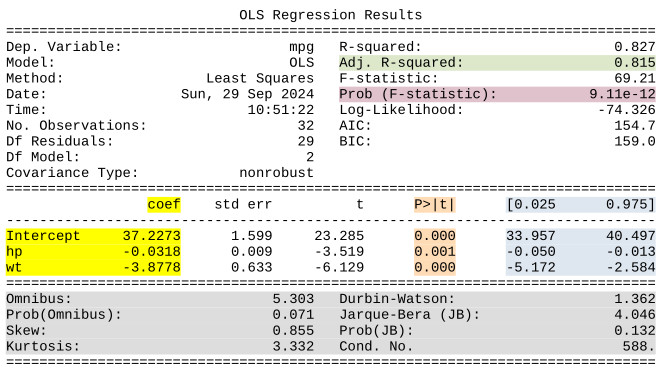

#### Important results in the summary

* **Coefficients** - The "coef" area (highlighted in yellow) lists the coefficients (the $b_{n}$ terms) that produce the lowest sum of squared errors.
* **Confidence intervals for coefficients** - Also provided to the right of the coefficients are the 95% confidence interval for each coefficient (highlighted in blue). Since the regression model is estimated based on a sample the coefficients estimated when the regression model is fit are point estimates for the coefficients that exist in the regression model for the population. The confidence intervals provide a range estimate for the population coefficients.
* **P-values for the coefficients** - The p-values (highlighted in orange) for the coefficients are p-values for t-tests to determine whether each $x$ variable has a statistically significant relationship with the dependent variable. Formally, the t-tests are tests of the null hypotheses that the true coefficient for each independent variable is 0, which would mean that it has no relationship with the dependent variable. If the p-value is below the threshold set before the analysis, typically $0.05$, that means we reject the null hypothesis that the true coefficient is zero and consider the relationship to be statistially significant.
* **Adjusted R-squared** - The R-squared value tells us what percentage of the variability in the dependent variable y can be explained by the regression model. So, $R^{2}$ ranges between $0$ and $1$, and, in general, the higher it is the better your regression model is. When there is more than one independent variable, however, we focus on the Adjusted R-squared value (highlighted in green), which adjusts R-squared to account for the number of independent variables.
* **F-test P-value** - The result labeled "Prob (F-statistic)" (highlighted in purple) is the p-value for a hypothesis test for which the null hypothesis is that *all* the coefficient values are zero, meaning that none of the independent variables are related to the dependent variable. In other words, this is a p-value for the test of whether the independent variables collectively have a relationship with the dependent variable. If the p-value is below the threshold set before the analysis, typically $0.05$, we reject the null hypothesis that all of the coefficients on the independent variables are zero and conclude that the full model is statistically significant.
* **Statistics to Evaluate Assumptions** - The bottom section of the results (highlighted in gray) has statistics which may be used to evaluate some of the assumptions of linear regression, such as the assumption that the errors in the population are normally distributed. Interpretation of these statistics is beyond the scope of this course, but you may use them in more advanced courses.

We can use the coefficients to build the regression equation that models the relationship between the variables and may be used to predict the value of $y_{i}$ according to horsepower and weight of the vehicle. Based on the results of our regression the regression equation would be:  

$$mpg = 37.227 - 0.032 * hp - 3.878 * wt$$  

Interpreting the coefficients depends on the units of the data. For example, the coefficient on `hp` is $-0.032$. The coefficient represents the average change in the y variable for a 1-unit increase in the predictor variable, when all other variables are held constant. So, this means that, on average, mpg decreases by 0.032 miles per gallon for each unit of horsepower the car has. The coefficient on `wt` is $-3.878$. The `wt` values in the dataset range from $1.51$ to $5.42$, so they are likely expressed in units of $1,000$ lbs. The coefficient, $-3.878$ thus means that, on average, miles per gallon decreases by $3.878$ for each $1,000$ lbs of the car's weight.

The coefficient estimats are point estimates. We can also refer to the 95% confidence intervals if range estimates are preferred. The 95% confidence interval for the `wt` coefficient is -5.172 to -2.584. Thus, we are 95% confident that in the population MPG decreases by between 2.584 and 5.172 for each additional 1,000 lbs of vehicle weight.

### More Detailed Results

The values shown in the results summary, as well as many other quantities of interest, may be extracted directly from the fitted model's results object. As a reminder, below is the code line that fit the model to the data and assigned the results to the variable `results_2`.

```python
results_2 = mpg_model_2.fit()
```

The results object has many methods and properties we can use to access various results. Below we produce a list of all of the methods and properties of the results object. These can all be accessed with dot notation. See [the documentation for the regression results object](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html) for more details on these methods and properties.

In [35]:
print(dir(results_2))

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abat_diagonal', '_cache', '_data_attr', '_data_in_cache', '_get_robustcov_results', '_get_wald_nonlinear', '_is_nested', '_transform_predict_exog', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'info_crit

Below are some examples of accessing some of the statistics from the results summary individually by using properties of the results object.

In [9]:
# adjusted r-squared
print(f"Adjusted R-squared: {results_2.rsquared_adj}")

Adjusted R-squared: 0.8148396209781563


In [10]:
# coefficients
print(f"\nCoefficients:\n{results_2.params}")


Coefficients:
Intercept    37.227270
hp           -0.031773
wt           -3.877831
dtype: float64


In [11]:
# p-values for the coefficients
print(f"\nP-values for the coefficients:\n{results_2.pvalues}")


P-values for the coefficients:
Intercept    2.565459e-20
hp           1.451229e-03
wt           1.119647e-06
dtype: float64


In [12]:
# errors ("residuals")
results_2.resid

rownames
Mazda RX4             -2.572329
Mazda RX4 Wag         -1.583483
Datsun 710            -2.475819
Hornet 4 Drive         0.134980
Hornet Sportabout      0.372733
Valiant               -2.373816
Duster 360            -1.299042
Merc 240D              1.512933
Merc 230               0.806327
Merc 280              -0.779460
Merc 280C             -2.179460
Merc 450SE             0.674631
Merc 450SL             0.256169
Merc 450SLC           -1.649939
Cadillac Fleetwood     0.044795
Lincoln Continental    1.037267
Chrysler Imperial      5.507513
Fiat 128               5.800972
Honda Civic            1.087620
Toyota Corolla         5.853791
Toyota Corona         -3.086441
Dodge Challenger      -3.311364
AMC Javelin           -3.940979
Camaro Z28            -1.252028
Pontiac Firebird       2.443255
Fiat X1-9             -0.326653
Porsche 914-2         -0.037374
Lotus Europa           2.630231
Ford Pantera L        -0.746489
Ferrari Dino          -1.225413
Maserati Bora          2.260523

In [13]:
# fitted values (predictions of the dependent variable)
results_2.fittedvalues

rownames
Mazda RX4              23.572329
Mazda RX4 Wag          22.583483
Datsun 710             25.275819
Hornet 4 Drive         21.265020
Hornet Sportabout      18.327267
Valiant                20.473816
Duster 360             15.599042
Merc 240D              22.887067
Merc 230               21.993673
Merc 280               19.979460
Merc 280C              19.979460
Merc 450SE             15.725369
Merc 450SL             17.043831
Merc 450SLC            16.849939
Cadillac Fleetwood     10.355205
Lincoln Continental     9.362733
Chrysler Imperial       9.192487
Fiat 128               26.599028
Honda Civic            29.312380
Toyota Corolla         28.046209
Toyota Corona          24.586441
Dodge Challenger       18.811364
AMC Javelin            19.140979
Camaro Z28             14.552028
Pontiac Firebird       16.756745
Fiat X1-9              27.626653
Porsche 914-2          26.037374
Lotus Europa           27.769769
Ford Pantera L         16.546489
Ferrari Dino           20.925413
M

## Checking Linear Regression Assumptions 

Before we accept the results of our regression analysis, in particular the various standard errors and p-values, we need to check to see if our data met the assumptions for linear regression. Most of these assumptions have to do with the errors in the population. Keep in mind that the residuals are not the population errors. Because the regression results are based on a sample and not the entire population the residuals are actually estimates of the error term for each observation.

The key assumptions for linear regression are the following:

1. The effect of any change in an independent variable on the dependent variable should be constant over the range of the dependent variable. That is, the model will be linear
2. The errors have a population mean of zero
3. The errors are independent of the independent variables and each other
4. The errors are normally distributed
5. The errors have equal variance over the range of the dependent variable (also called homoscedasticity of errors)
6. No two independent variables are perfectly correlated with each other (that is, no independent variable is a perfect linear function of another of the independent variables) 

Details of how to determine if the linear regression assumptions are violated and how to adjust the model to deal with those violations is beyond the scope of this course. We will take a look at the basics, though, by reviewing some tables and plots that are commonly used to check the assumptions.

### Plots of Independent vs Dependent Variables

Plots of each independent variable vs the dependent variable may be used to evaluate the assumption of linearity. In the plots below we see that the relationships between horsepower and MPG and vehicle weight and MPG both have a bit of a parabola shape, which indicates that the relationships between horsepower and MPG and vehicle weight and MPG may be better modeled as quadratic than linear. That is, it might be better to include the squares of `hp` and `mpg` in the model.

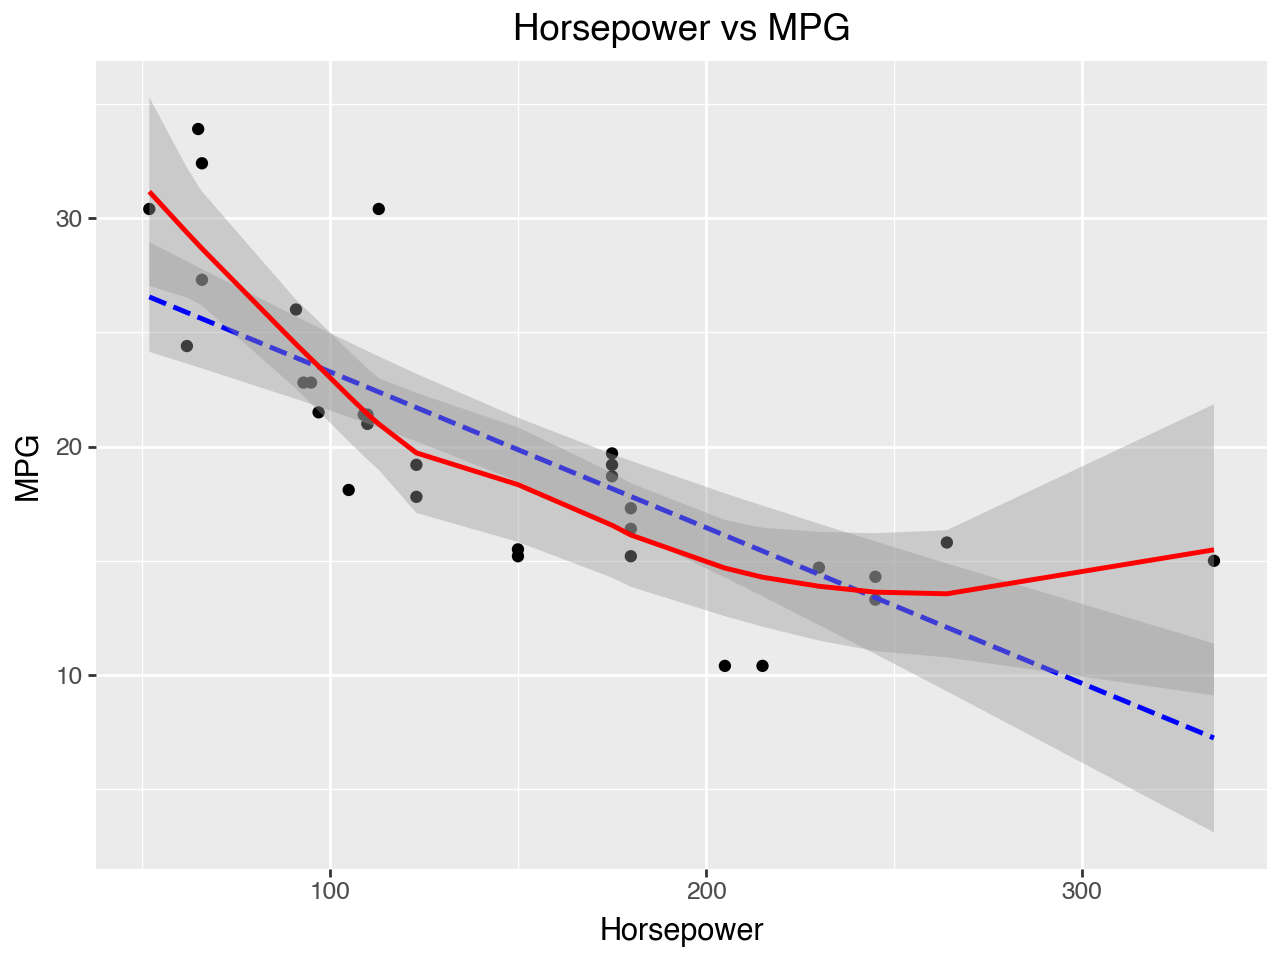

In [14]:
(
    ggplot(data = car_dat, 
           mapping = aes(x = 'hp', y = 'mpg'))
    + geom_point()
    + geom_smooth(method = 'lm', color = 'blue', linetype = '--')
    + geom_smooth(color = 'red')
    + labs(
        title = 'Horsepower vs MPG',
        x = 'Horsepower', 
        y = 'MPG' 
    )
)

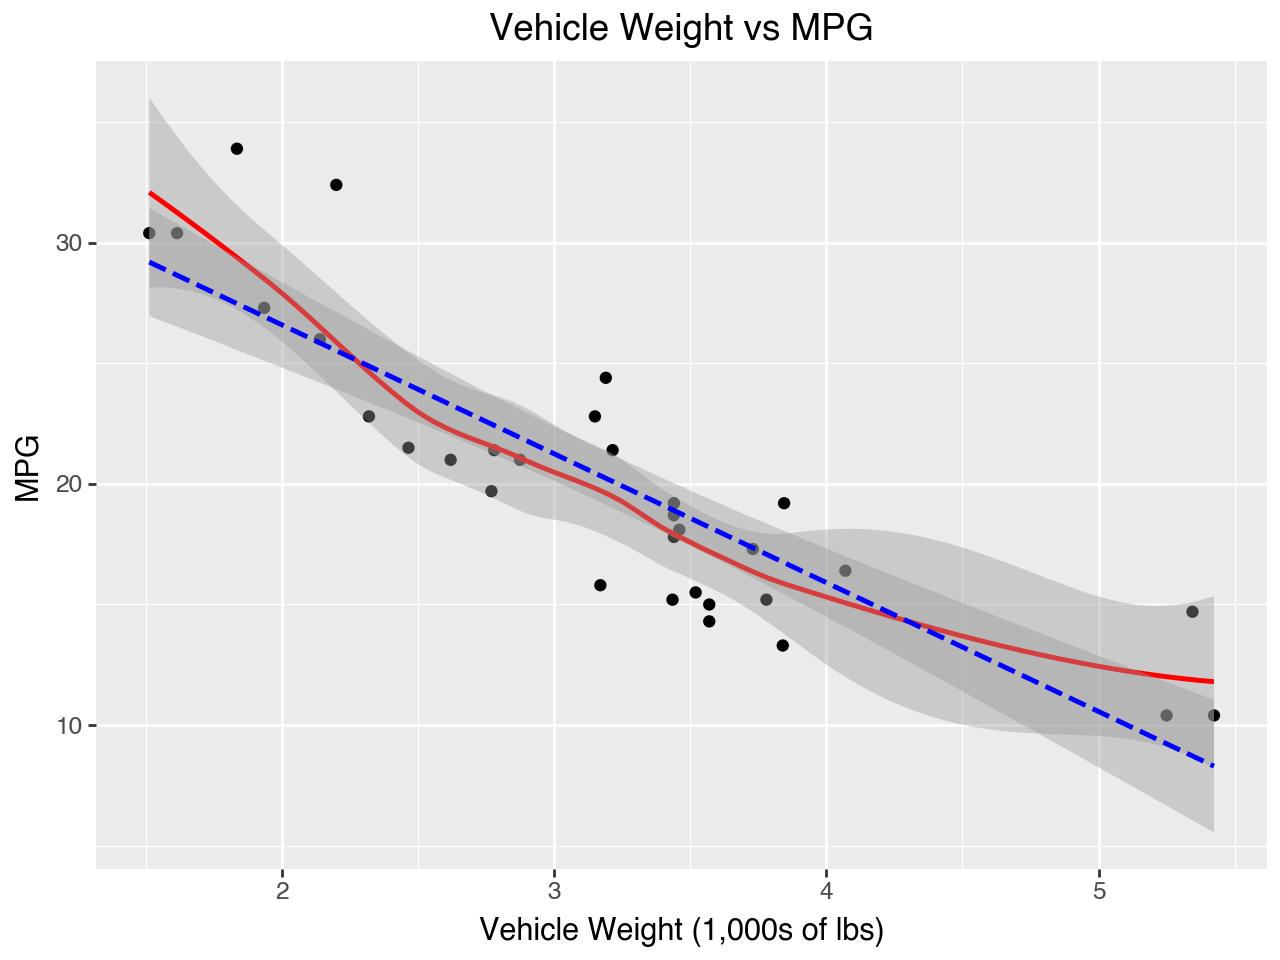

In [15]:
(
    ggplot(data = car_dat, 
           mapping = aes(x = 'wt', y = 'mpg'))
    + geom_point()
    + geom_smooth(color = 'red')
    + geom_smooth(method = 'lm', color = 'blue', linetype = '--')
    + labs(
        title = 'Vehicle Weight vs MPG',
        x = 'Vehicle Weight (1,000s of lbs)', 
        y = 'MPG' 
    )
)

### Residuals vs Fitted Values Plot

The "Residuals vs Fitted Values" plot may be used to evaluate the assumptions of linearity, error population mean of zero and equal variance of errors over the range of fitted values. Let's create the plot first and then discuss it in more detail.

Below we take the residuals and fitted values from the `results_2` regression results object, put them into a DataFrame, and then make the plot with plotnine.

In [16]:
resid_vs_fitted = pd.DataFrame({
    'residuals': results_2.resid,
    'fitted': results_2.fittedvalues
})

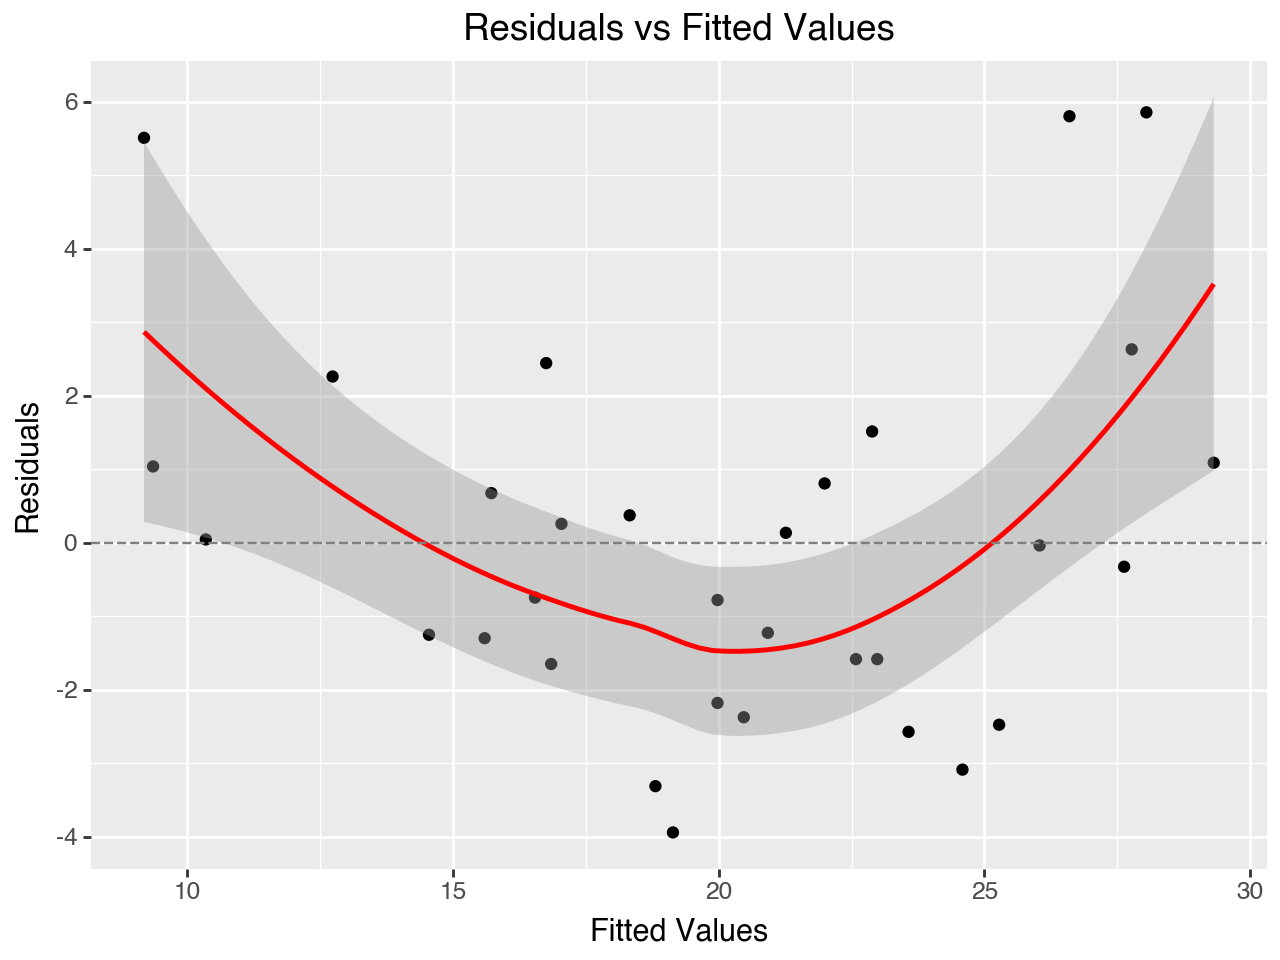

In [17]:
(
    ggplot(data = resid_vs_fitted, 
           mapping = aes(x = 'fitted', y = 'residuals'))
    + geom_point()
    + geom_smooth(span = 1, color = 'red')
    + geom_hline(yintercept = 0, color = 'gray', linetype = '--')
    + labs(
        title = 'Residuals vs Fitted Values',
        x = 'Fitted Values', 
        y = 'Residuals' 
    )
)

#### Checking for linearity

If the relationships between the independent variables and the dependent variable are linear the dots on this plot should be scattered in a roughly horizontal band centered around the y = 0 line. In the plot above we see more of a curved pattern. This reflects the quadratic relationship between horsepower and MPG and vehicle weight and MPG that we saw in the scatterplots of each independent variable vs the dependent variable. 

#### Checking for errors having population mean of zero

If the errors have a population mean of zero we expect the errors in our sample, the residuals, to have a mean close to zero. On the residuals vs fitted values plot there is a center line at y = 0. If the residuals seem to be relatively evenly distributed on both sides of this center line then we have evidence that the assumption of the errors having a population mean of zero is met. If the residuals are concentrated on either side of the center line then this assumption is likely violated. This assumption appears to be met for our regression model.

#### Checking for equal variance of errors

If the errors in the population have equal variance across the range of the dependent variable then we expect to see relatively equal variance of the residuals across the range of fitted values. This assumption appears to be met for our regression model.

### Normal (Q-Q) Plot of Residuals
The normal Q-Q plot tells us whether or not the residuals are normally distributed. The closer to a diagonal straight line this plot is, the closer the residuals are to being normally distributed. Because the residuals are a sample of the errors in the population, if they are approximately normally distributed that provides evidence that the population errors are also approximately normally distributed.

Below we use plotnine's `geom_qq()` and `geom_qq_line()` functions to make the plot.

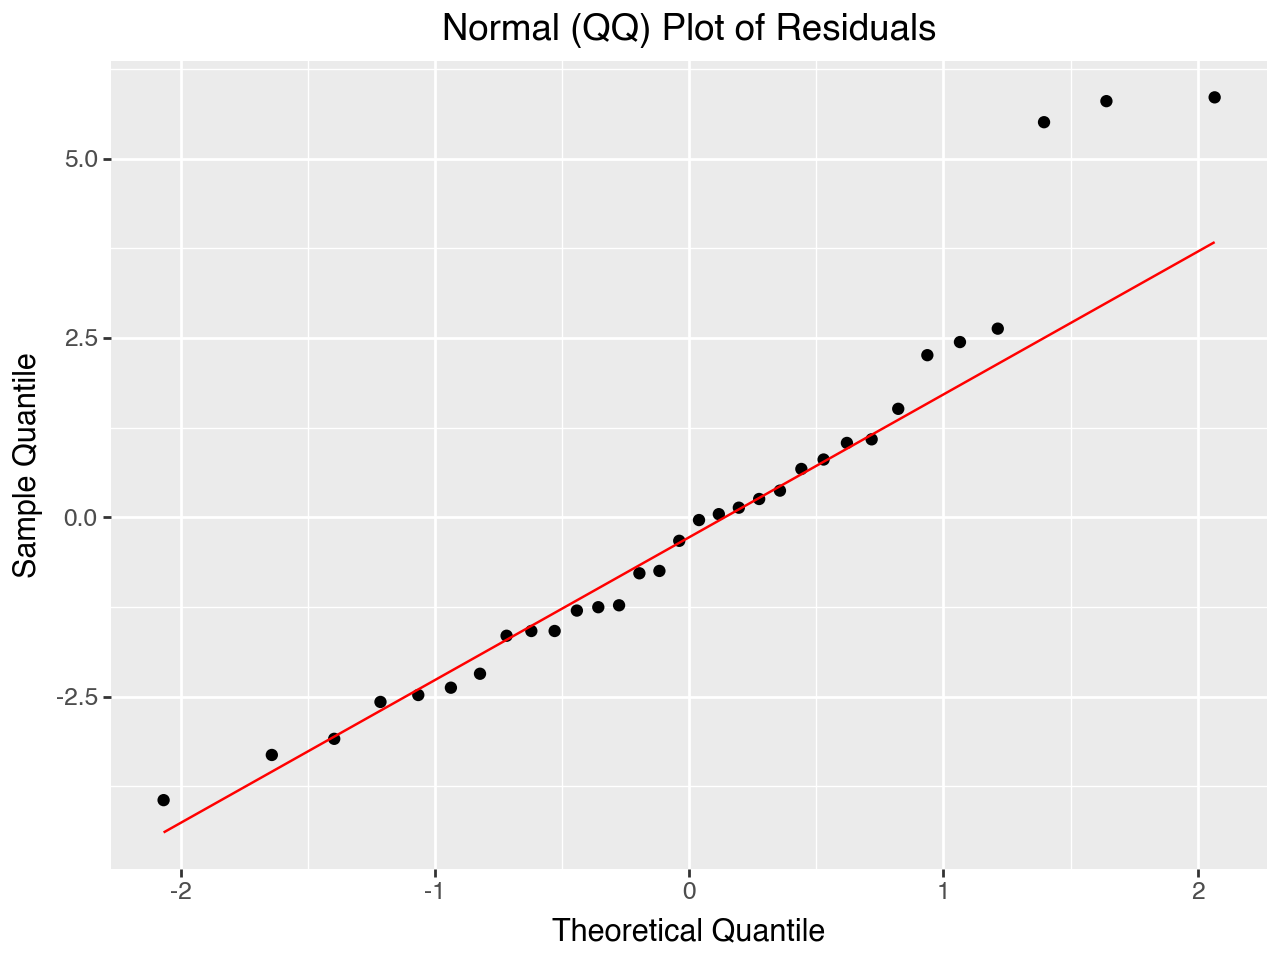

In [18]:
(
    ggplot(data = resid_vs_fitted, mapping = aes(sample = 'residuals'))
    + geom_qq()
    + geom_qq_line(color = 'red')
    + labs(
        title = 'Normal (QQ) Plot of Residuals',
        x = 'Theoretical Quantile',
        y = 'Sample Quantile'
    )
)

### Scale-Location Plot

The "Scale-Location" plot (also called the Spread-Location plot) is used to check the equal variance assumption (homoscedasticity of residuals). It plots the square roots of the absolute values of the standardized residuals against the fitted values. The plot shows whether the errors are spread equally along the range of the dependent variable. The red line should be horizontal or close to it, and the dots should be arranged randomly around the red line.  

This plot shows some violation of the assumption of equal variance, as there appears to be higher variance (a wider bar) for both the low and high ranges of fitted values.

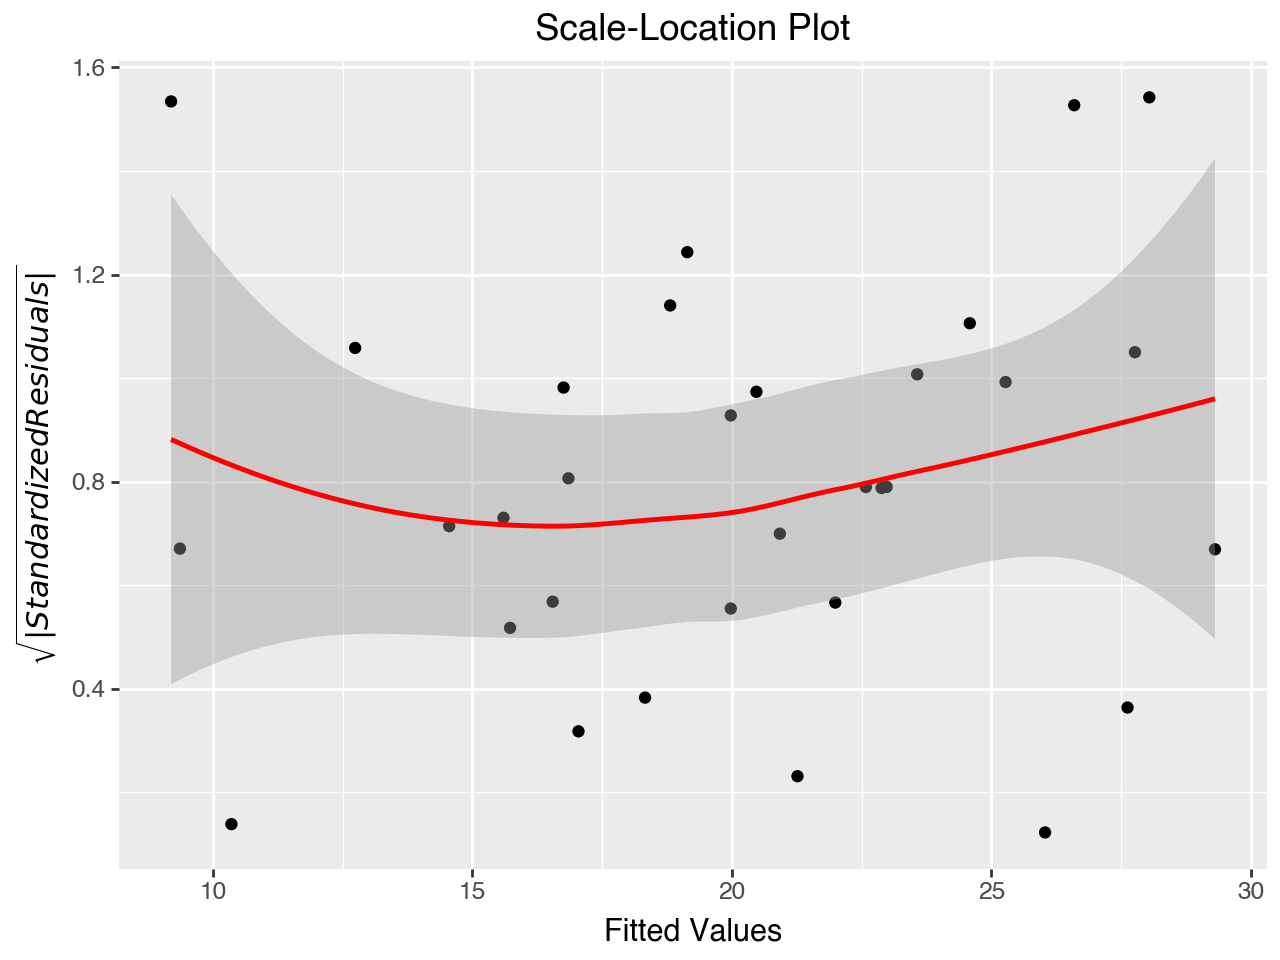

In [19]:
# Use statsmodels to get standardized residuals
std_residuals = results_2.get_influence().resid_studentized_internal

# Calculate the sqrt of the absolute value of the normalized residuals
resid_vs_fitted['sasr'] = np.sqrt(np.absolute(std_residuals))

# Make the plot
(
    ggplot(data = resid_vs_fitted, 
           mapping = aes(x = 'fitted', y = 'sasr'))
    + geom_point()
    + geom_smooth(span = 1, color = 'red')
    + labs(
        title = 'Scale-Location Plot', x = 'Fitted Values',
#            y = 'Square Root of Abs. Val. of Std. Residuals')
           y = '$\sqrt{|StandardizedResiduals|}$'
    )
)

### Correlations and Variance Inflation Factor (VIF)

The assumption that the independent variables are not too highly correlated with each other may be assessed with a correlation table or by calculating the variance inflation factor (VIF) for each independent variable. It is essential that the independent variables are not too highly correlated with each other, a condition known as multicollinearity. Excessive multicollinearity is indicated when there are correlation coefficients between independent variables of 0.80 or above, or when VIF values are greater than 10 (some references say VIF should be 5 or less).

#### Correlations

We can use the pandas `corr()` function to make a quick correlation table for the independent variables. When we do so we see that the correlation between `hp` and `wt` is $0.66$, which is within the threshold of 0.80.

In [20]:
car_dat[['hp', 'wt']].corr()

hp        wt
hp  1.000000  0.658748
wt  0.658748  1.000000

#### Variance Inflation Factor

Variance Inflation Factor (VIF) is a measure of multicollinearity (correlation between predictors). VIF > 10 for a variable indicates that it is highly collinear with the other independent variables.  

Statsmodels has a function to calculate and display the VIF. It is imported with the following line:
```python
from statsmodels.stats.outliers_influence import variance_inflation_factor
```

To use the function we need a matrix of the independent variables, including the column of 1s used to calculate the intercept. We create the matrix below. To show another way of adding the column of 1s we do it here by simply using pandas syntax to add a new column named `const`.

In [21]:
X = car_dat.loc[:, ['hp', 'wt']]
# X = sm.add_constant(X)
X['const'] = 1
X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hp      32 non-null     int64  
 1   wt      32 non-null     float64
 2   const   32 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.0+ KB


Next we use a loop to print out the VIFs. The VIFs are well within the acceptable range.

In [22]:
for idx, val in enumerate(X):
    print(f"{val}\t VIF is {round(variance_inflation_factor(X, idx), 3)}")

hp	 VIF is 1.767
wt	 VIF is 1.767
const	 VIF is 12.162


## Identifying Influential Observations

In addition to checking the assumptions for linear regression it is common practice to also check for ***influential obervations***. An influential observation is one that has a large effect on the results of the regression coefficients. Observations that are at the extremes of the x variable range are said to have ***high leverage*** because they have the potential for a large effect on the regression coefficients. Observations have high influence when they have high leverage and would be far from the regression line if model was fit without them, or if they have unusually large residuals, regardless of their leverage. So, influence is determined by a combination of leverage and size of the residual. Accordingly, a plot commonly used to identify observations with high influence is the residuals vs leverage plot.

### Residuals vs Leverage Plot

The "Residuals vs Leverage" plot is used to search for influential observations, which are observations with high (absolute value of) residuals and high leverage. It plots each observation's leverage vs its standardized residual. This plot also typically includes ***Cook's distance***, which is a numeric measure of influence. The formula for calculating Cook's distance has in its numerator the sum of squared differences in the predicted values if the regression is run with and without the observation. Any points with Cook's distance greater than 0.5 are considered influential observations (observations that can significantly affect the model) and need further investigation.  

Some versions of this plot add a dotted line at Cook's distance = 0.5 to make it easy to identify points outside the line. Here we will use a different color for points with a Cook's distance of greater than 0.5. However, there aren't any points in our regression that have Cook's distance greater than 0.5.

To get the leverage, standardized residuals, and Cook's distance we create an influence object from our results object and then use the influence object's `hat_matrix_diag` property to return the leverage, `resid_studentized_internal` property to return the standardized residuals, and the first array in the tuple of arrays returned returned by the 'cooks_distance` property to return Cook's distance.

In [23]:
#create instance of influence
influence = results_2.get_influence()

# Get leverage from statsmodels
leverage = influence.hat_matrix_diag

# Get Cook's distance from statsmodels
cooks_dist = influence.cooks_distance[0]

# Use statsmodels to get standardized residuals
std_residuals = influence.resid_studentized_internal

lev_df = pd.DataFrame({
    'leverage': leverage,
    'std_resid': std_residuals,
    'cooks': cooks_dist
})

lev_df['cooks_above_thresh'] = np.where(lev_df['cooks'] > 0.5, 'Y', 'N')

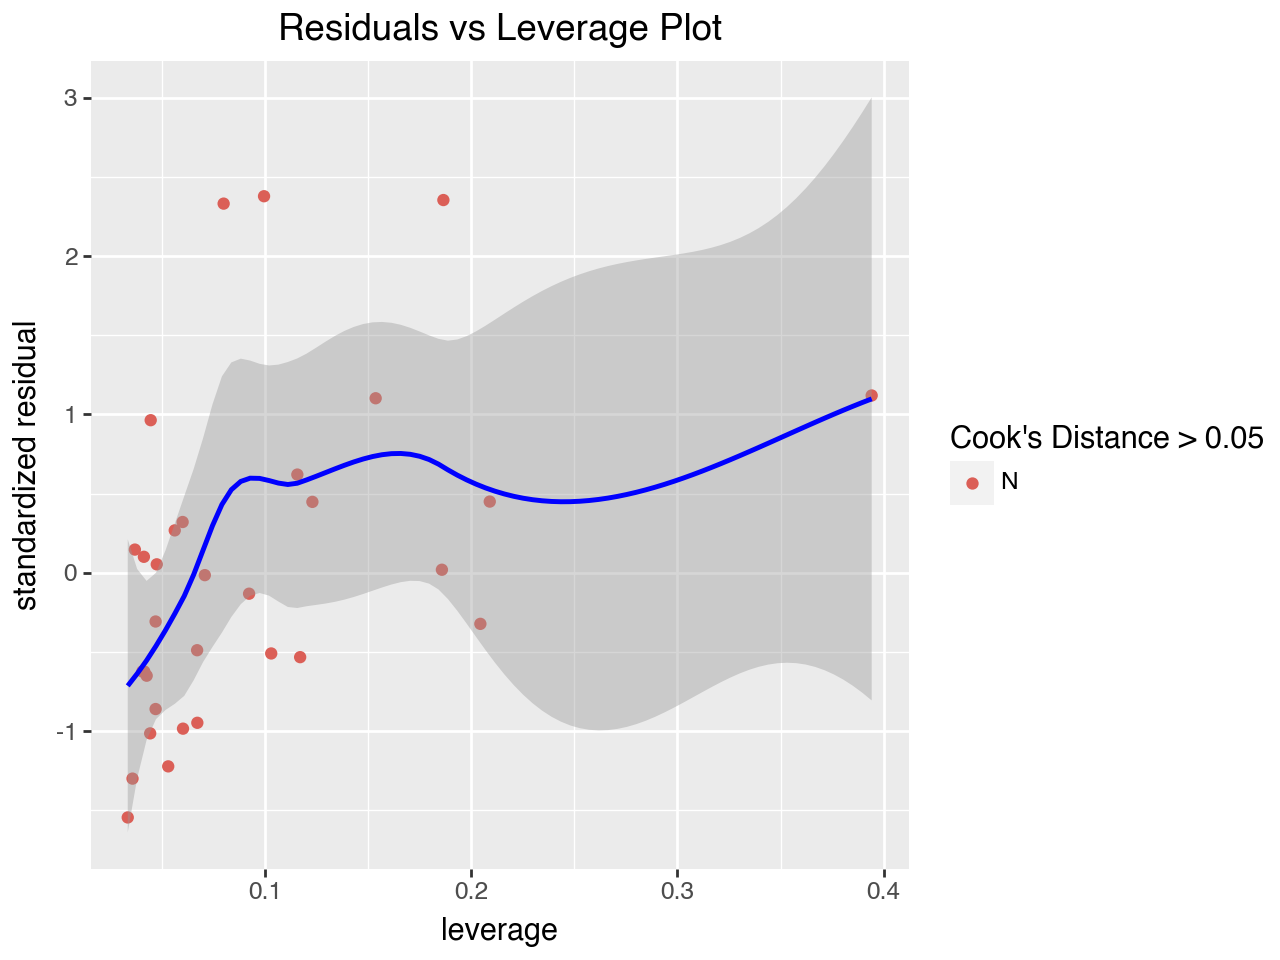

In [24]:
(
    ggplot(data = lev_df, 
           mapping = aes(x = 'leverage', y = 'std_resid', color = 'cooks_above_thresh'))
    + geom_point()
    + geom_smooth(span = 0.8, color = 'blue')
    + labs(
        title = "Residuals vs Leverage Plot",
        x = 'leverage',
        y = 'standardized residual',
        color = "Cook's Distance > 0.05"
        )
)

## Adding Polynomial Terms to Deal with Non-Linearity

Our evaluation of the regression assumptions revealed potential problems with non-linear relationships between the independent variables and the dependent variable and unequal variance of the errors across the range of fitted values (called heteroscedasticity).

When the relationship between an independent variable and the dependent variable demonstrates a parabola shape on the scatterplot this indicates that the relationship is quadratic. We can capture the quadratic nature of the relationship by adding squared terms to our regression model. In order to reduce the correlation among independent variables (multicollinearity) the variables are typically mean-centered or standardized before calculating the squared term. Below we mean-center the `hp` and `wt` variables by subtracting the mean from each observation, add squared terms, and then re-fit the regression model.

In [25]:
car_dat['hp_cnt'] = car_dat['hp'] - car_dat['hp'].mean()
car_dat['wt_cnt'] = car_dat['wt'] - car_dat['wt'].mean()

car_dat['hp_cnt_sq'] = car_dat['hp_cnt'] ** 2
car_dat['wt_cnt_sq'] = car_dat['wt_cnt'] ** 2

In [26]:
# Instantiate the ols model with the formula interface
mpg_model_3 = smf.ols(formula = 'mpg ~ hp_cnt + wt_cnt + hp_cnt_sq + wt_cnt_sq', data = car_dat)

# fit the model instance to the data and assign results to a variable
results_3 = mpg_model_3.fit()

# print summary of the results
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     55.02
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           1.36e-12
Time:                        12:42:59   Log-Likelihood:                -66.955
No. Observations:                  32   AIC:                             143.9
Df Residuals:                      27   BIC:                             151.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5084      0.560     33.050      0.0

We can see that the revised model has a better fit with the data, as it has a higher R-squared value. Let's examine the diagnostic plots below to see if any issues remain.

In [27]:
resid_vs_fitted = pd.DataFrame({
    'residuals': results_3.resid,
    'fitted': results_3.fittedvalues
})

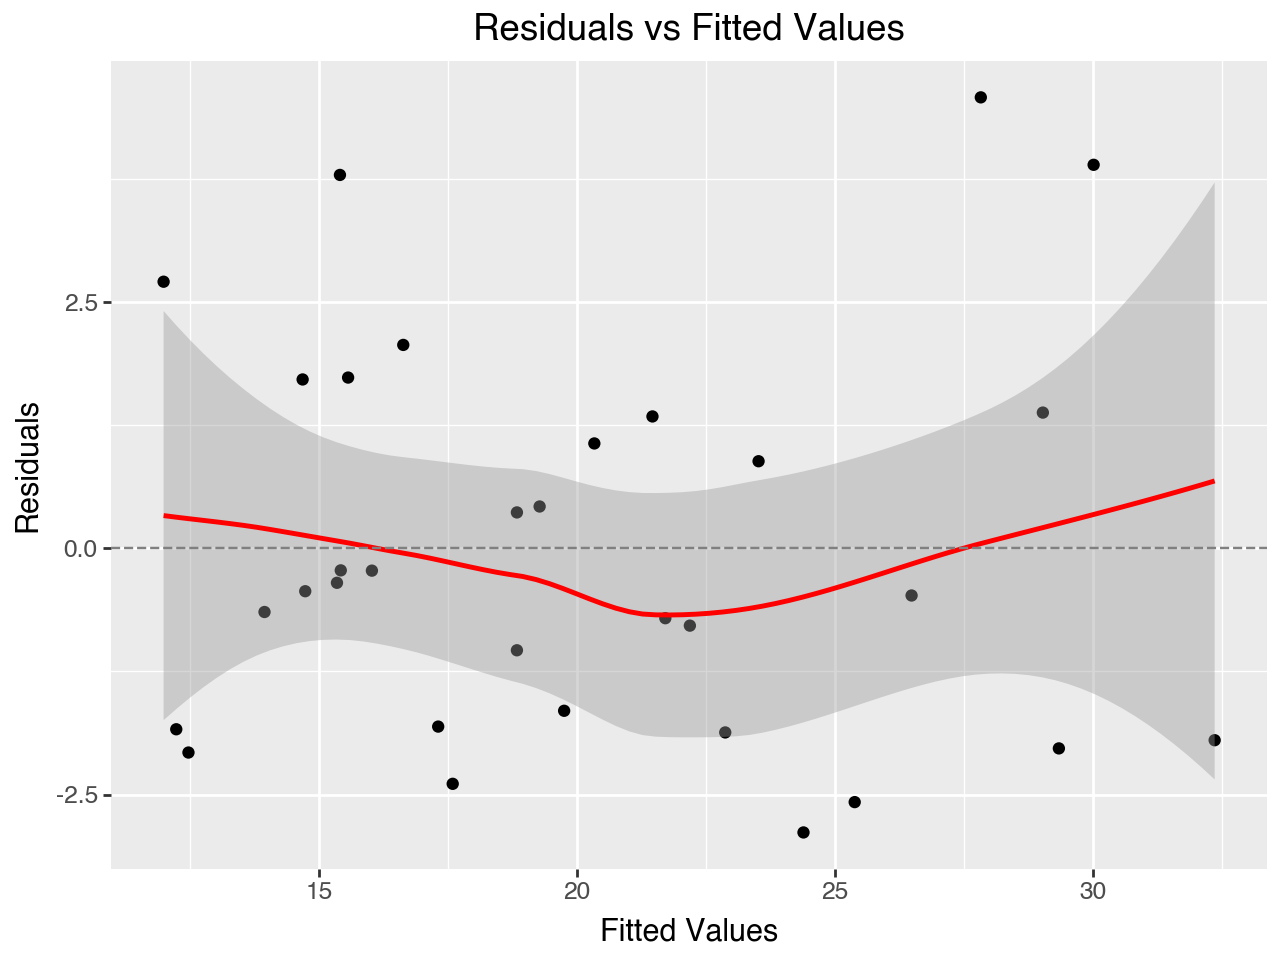

In [28]:
(
    ggplot(data = resid_vs_fitted, 
           mapping = aes(x = 'fitted', y = 'residuals'))
    + geom_point()
    + geom_smooth(span = 1, color = 'red')
    + geom_hline(yintercept = 0, color = 'gray', linetype = '--')
    + labs(
        title = 'Residuals vs Fitted Values',
        x = 'Fitted Values', 
        y = 'Residuals' 
    )
)

The Residuals vs Fitted Values plot is much better for our revised regression model. It doesn't show as much of a U shape as the plot did for our original regression model.

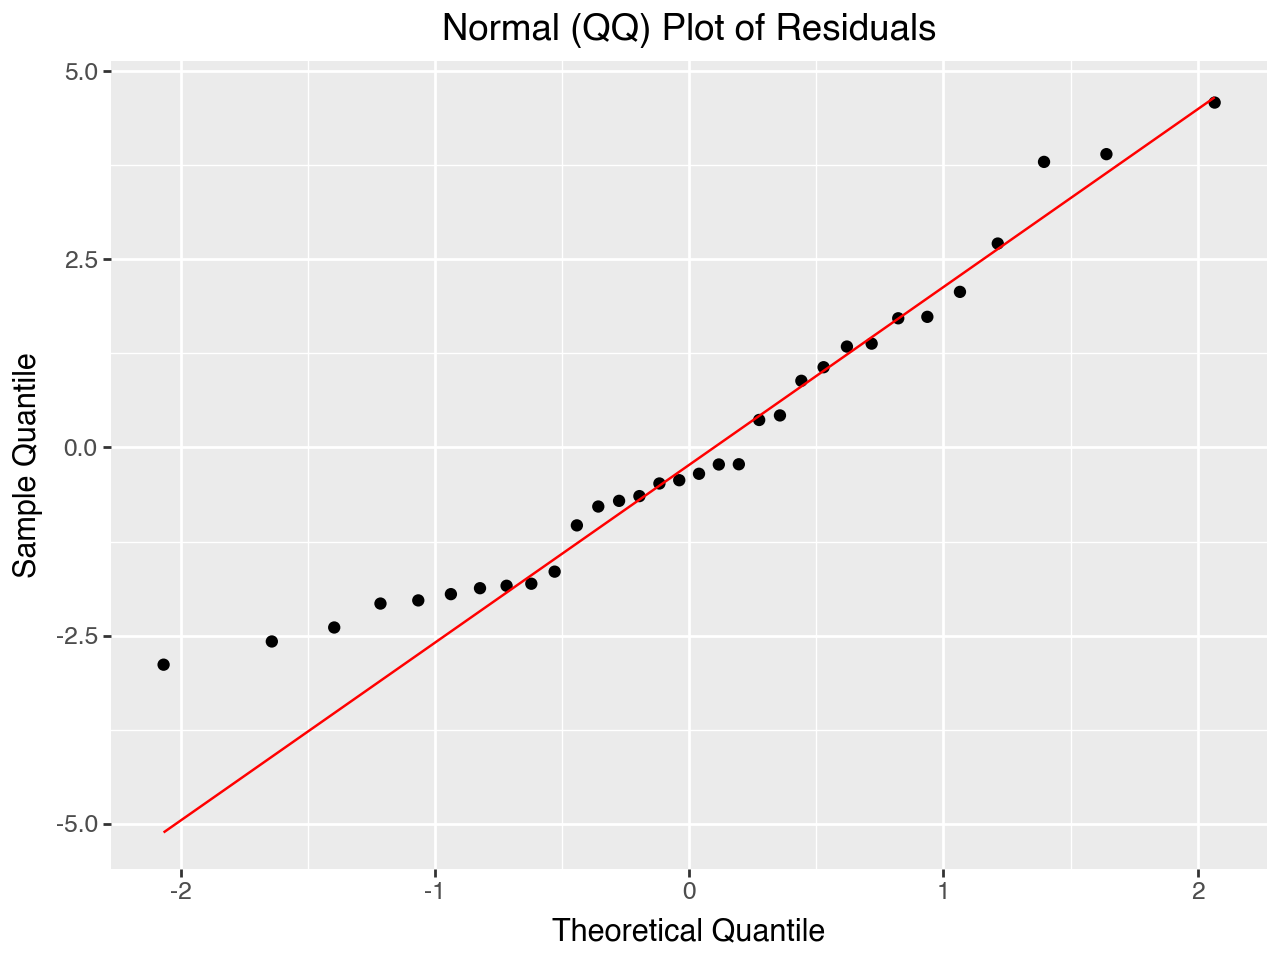

In [29]:
(
    ggplot(data = resid_vs_fitted, mapping = aes(sample = 'residuals'))
    + geom_qq()
    + geom_qq_line(color = 'red')
    + labs(
        title = 'Normal (QQ) Plot of Residuals',
        x = 'Theoretical Quantile',
        y = 'Sample Quantile'
    )
)

The Normal QQ Plot of the residuals is approximately normal, as it was with our original regression model.

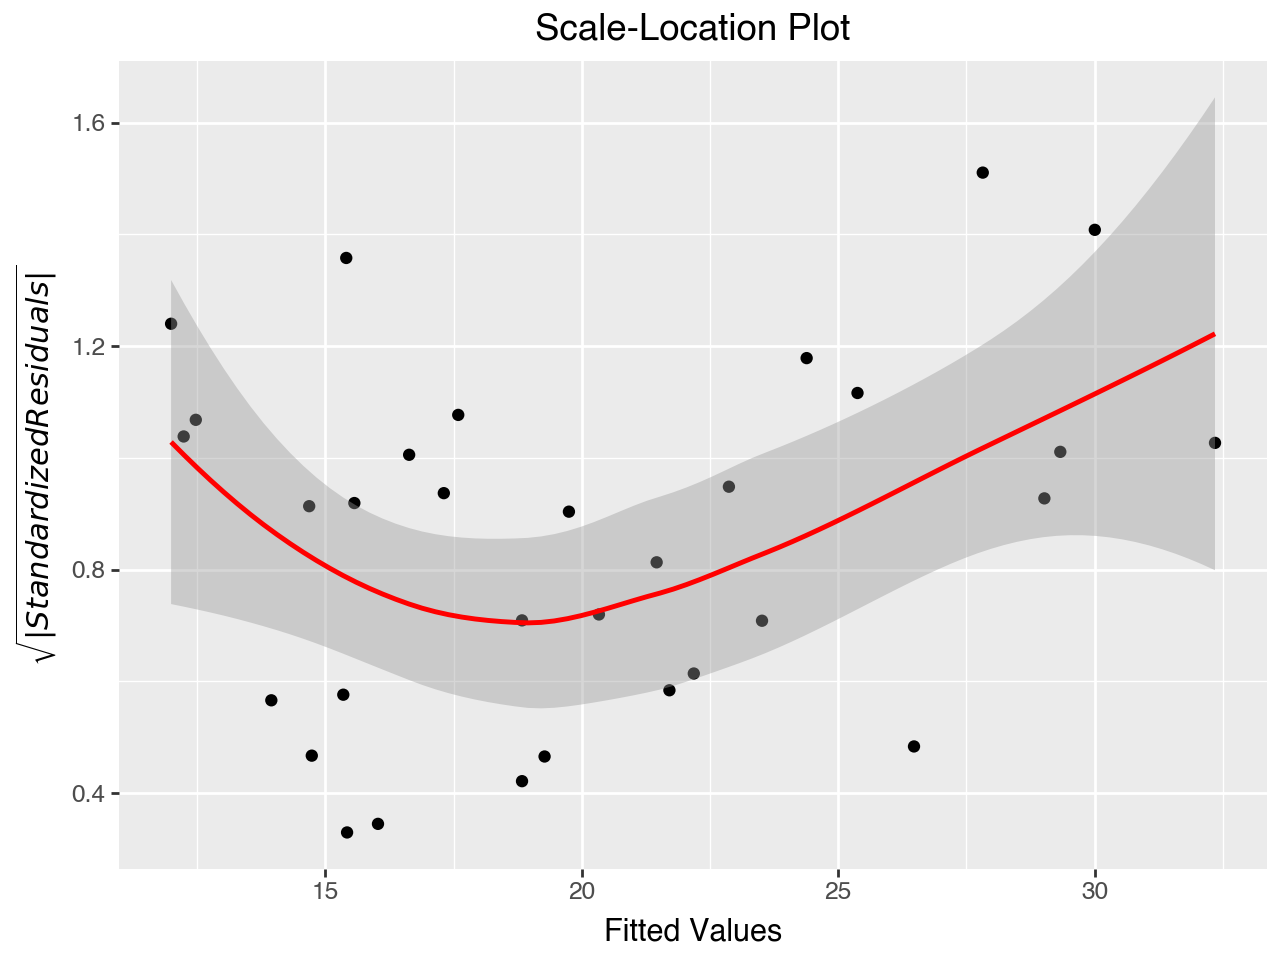

In [30]:
# Use statsmodels to get standardized residuals
std_residuals = results_3.get_influence().resid_studentized_internal

# Calculate the sqrt of the absolute value of the normalized residuals
resid_vs_fitted['sasr'] = np.sqrt(np.absolute(std_residuals))

# Make the plot
(
    ggplot(data = resid_vs_fitted, 
           mapping = aes(x = 'fitted', y = 'sasr'))
    + geom_point()
    + geom_smooth(span = 1, color = 'red')
    + labs(
        title = 'Scale-Location Plot', x = 'Fitted Values',
#            y = 'Square Root of Abs. Val. of Std. Residuals')
           y = '$\sqrt{|StandardizedResiduals|}$'
    )
)

The Scale-Location Plot indicates that we still have a problem with heteroscedasticity. When the assumption of homoscedasticity is violated the coefficients produced by the model are still unbiased, but the standard errors, p-values, and confidence intervals for the coefficients may not be trusted.

In [31]:
#create instance of influence
influence = results_3.get_influence()

# Get leverage from statsmodels
leverage = influence.hat_matrix_diag

# Get Cook's distance from statsmodels
cooks_dist = influence.cooks_distance[0]

# Use statsmodels to get standardized residuals
std_residuals = influence.resid_studentized_internal

lev_df = pd.DataFrame({
    'leverage': leverage,
    'std_resid': std_residuals,
    'cooks': cooks_dist
})

lev_df['cooks_above_thresh'] = np.where(lev_df['cooks'] > 0.5, 'Y', 'N')

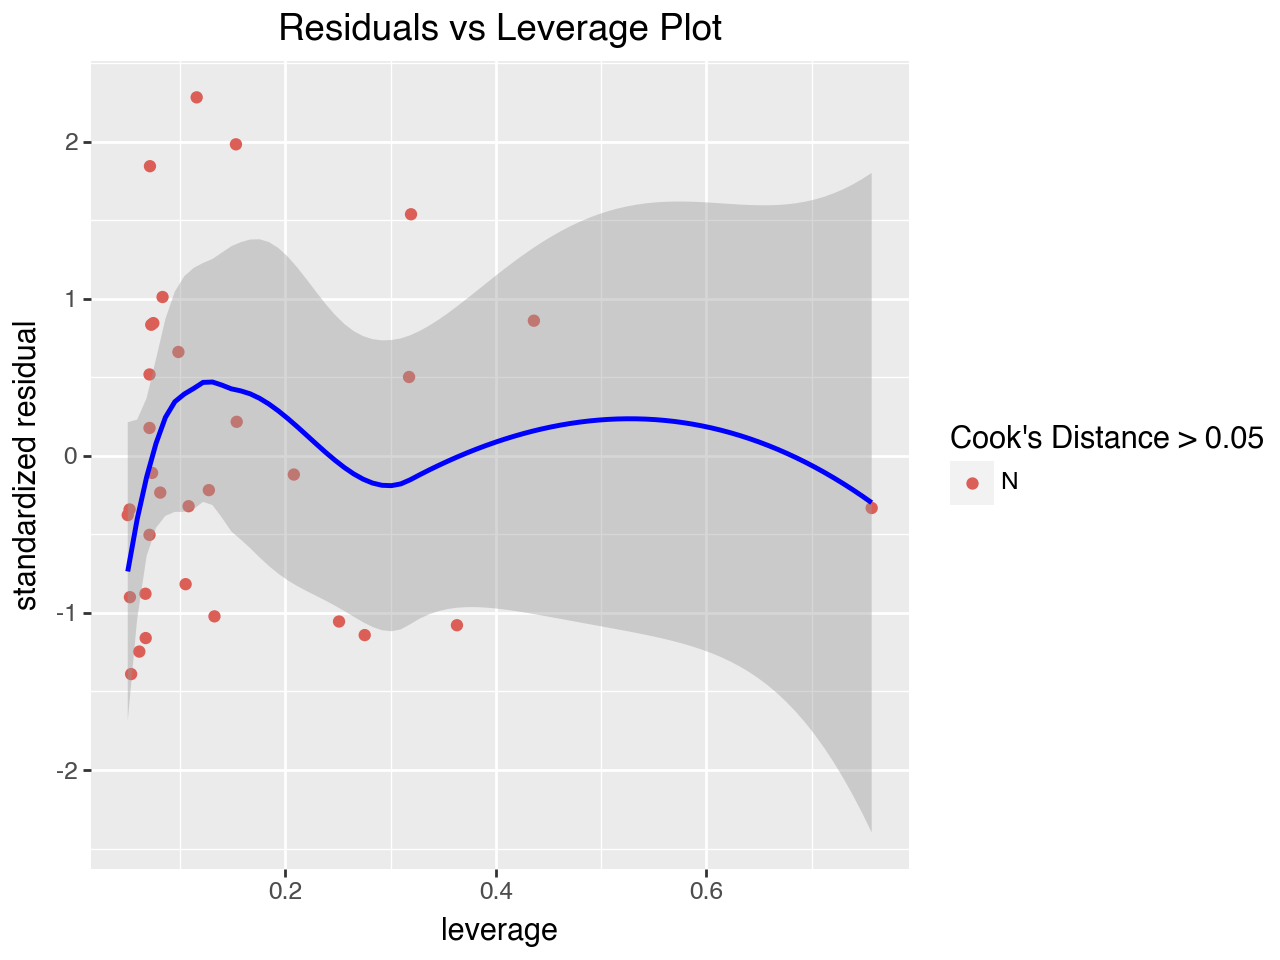

In [32]:
(
    ggplot(data = lev_df, 
           mapping = aes(x = 'leverage', y = 'std_resid', color = 'cooks_above_thresh'))
    + geom_point()
    + geom_smooth(span = 0.8, color = 'blue')
    + labs(
        title = "Residuals vs Leverage Plot",
        x = 'leverage',
        y = 'standardized residual',
        color = "Cook's Distance > 0.05"
        )
)

As with our original model, the Residuals vs Leverage Plot does not show any issues with influential cases.

In [33]:
X = car_dat.loc[:, ['hp_cnt', 'wt_cnt', 'hp_cnt_sq', 'wt_cnt_sq']]
# X = sm.add_constant(X)
X['const'] = 1
X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   hp_cnt     32 non-null     float64
 1   wt_cnt     32 non-null     float64
 2   hp_cnt_sq  32 non-null     float64
 3   wt_cnt_sq  32 non-null     float64
 4   const      32 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.5+ KB


In [34]:
for idx, val in enumerate(X):
    print(f"{val}\t VIF is {round(variance_inflation_factor(X, idx), 3)}")

hp_cnt	 VIF is 3.549
wt_cnt	 VIF is 2.79
hp_cnt_sq	 VIF is 1.948
wt_cnt_sq	 VIF is 1.185
const	 VIF is 2.202


The VIFs are all less than the most conservative commonly-cited threshold of 5.0.

## Conclusion

This chapter provides only a brief introduction to linear regression and regression diagnostics. In more advanced statistics courses you can learn many different remedies to be applied if there are violations of the linear regression assumptions. These remedies include various transformations of the independent variables as well as the application of more sophisticated regression model types. OLS regression is the most fundamental type of regression, but there are many more sophisticated types that have been developed to deal with various violations of the key assumptions for linear regression. 

Note that the regression assumptions primarily determine whether we can trust the inferential statistics parts of the model summary, such as the standard errors, confidence intervals, and p-values. If we are using a regression model strictly for prediction, as we will do later in this course, we don't need to pay as much attention to whether or not the assumptions are met. We can evaluate the linear regression model based strictly on how well it performs in its predictions.